# Data cleaning and exploration

## 0 Imports

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [42]:
data = pd.read_csv("../dat/dips/DIPS_Data.csv", sep = ",", low_memory = False)


## 1 Data Cleaning

### 1.1 Predictors and target

In [43]:
data.head()

,code,okayt1,okayt2,teilt2,intnr,datum,s1,s2,s3,s4,...,alk30,litbiery,litweiny,litspiry,litalky,grambiry,gramweiy,gramspiy,gramalky,filter_$
0,33,1,1,1,5,9/6/1996,74,1,3,1,...,0,0,.2,0,.2,0,20,0,20,1
1,35,1,1,1,21,9/21/1996,74,1,3,1,...,0,5.6,.375,.0045,5.9795,224,37.5,1.8,263.3,1
2,37,2,1,1,16,9/17/1996,74,2,3,1,...,0,.0625,.05,.00703125,.11953125,2.5,5,2.8125,10.3125,0
3,51,1,1,1,5,9/9/1996,75,1,3,1,...,0,0,.3,.005625,.305625,0,30,2.25,32.25,1
4,56,1,1,1,10,5/30/1997,75,1,3,1,...,1,.75,2.2,.01125,2.96125,30,220,4.5,254.5,1


In [45]:
data["k1"].value_counts()

# get indices of rows where k1 is not " "
indices = data[data["k1"] != " "].index

# save indices to a file
with open("../dat/dips/indices_k1_not_space.txt", "w") as f:
    for index in indices:
        f.write(str(index) + "\n")

In [ ]:

# exclude all rows where k1 is not " "
data = data[data["k1"] == " "]
data




#### Predictors

In [22]:
predictors = ["whi_ges", "soz_ges", "gke_ges", "lzh_ges",
              "ile_sum1", "ile_sum2", "woc_gesp", "woc_gese",
              "asi_ges", "bsq_ges", "das_ges", "scl_gsi",
              # "scl_pst", "scl_psdi"
              ]

predictors_y = ["whi_gesy", "soz_gesy", "gke_gesy", "lzh_gesy",
                "asi_gesy", "bsq_gesy", "das_gesy", "scl_gsiy",
                # "scl_psty"
                ]

predictor_names = ["Positive mental health",    #whi_ges
                   "Social support",            #soz_ges (SAVE)
                   "General self-efficacy",     #gke_ges SAVE
                   "Life satisfaction",         #lzh_ges SAVE
                   "Stress 1",                  #ile_sum1 SAVE (life events?)
                   "Stress 2",                  #ile_sum2 SAVE (daily hassles?)
                   "Problem-focused coping",    #woc_gesp SAVE
                   "Emotion-focused coping",    #woc_gese SAVE
                   "Anxiety sensitivity",       #asi_ges SAVE
                   "Fear of Bodily Sensations", #bsq_ges SAVE
                   "Dysfunctional attitudes",   #das_ges SAVE
                   "General Psychopathology: Global Severity Index (GSI)",    #scl_gsi SAVE
                   # "General Psychopathology: Positive Symptom Total (PST)",    #scl_pst SAVE
                   # "General Psychopathology: Positive Symptom Distress Index (PSDI)"    #scl_psdi SAVE
                   ]

extra_preds = ["fqn_ges",
               # "fq_ag", "fq_s", "fq_bi",
               "bdi_ges", "bai_ges",
               # "bdi_bel", "bai_bel",
               "ifa_int", "ifa_ext"]

extra_preds_y = ["fqn_gesy",
                 # "fq_agy", "fq_sy", "fq_biy",
                 "bdi_gesy", "bai_gesy",
                 # "bdi_bely", "bai_bely",
                 "ifa_inty", "ifa_exty"]


extra_preds_names = ["Phobia total",                     #fqn_ges (SAVE)
                     # "Agoraphobia",                      #fq_ag
                     # "Social phobia",                    #fq_s
                     # "Blood/Injection phobia",           #fq_bi
                     "Beck Depression Inventory",        #bdi_ges (SAVE)
                     # "Dysfunctional beliefs (from BDI)", #bdi_bel (SAVE)
                     "Beck Anxiety Inventory",           #bai_ges (SAVE)
                     # "Dysfunctional beliefs (from BAI)", #bai_bel (SAVE)
                     "Internal focus of attention", #ifa_int
                     "External focus of attention" #ifa_ext
                     ]

demographics = ["bild", "bmi_kat", "ses_kom"]

demographics_y = ["bmi_katy"]

#### Target

In [23]:
# get all columns that start with "hpi" but NOT "hpis"
hpi_cols = [col for col in data.columns if col.startswith('hpi') and not col.startswith('hpis')]

data['hpi'] = data[hpi_cols].apply(lambda x: 1 if any(x == 2) else 0, axis = 1)

# count the number of rows with a value of 1 in the new column
data['hpi'].value_counts(normalize = True)

hpi
0    0.749178
1    0.250822
Name: proportion, dtype: float64

In [24]:
data = data[predictors + extra_preds + demographics + predictors_y + extra_preds_y + demographics_y + ["hpi"]]

### 1.2 Missing values

In [25]:
data = data.replace(" ", np.nan)

In [26]:
for col in data.columns:
    print(data[col].value_counts())

whi_ges
1     317
0     291
2     213
3     140
4      70
5      44
6      28
7      16
8       8
10      6
9       5
11      2
12      1
Name: count, dtype: int64
soz_ges
4.77272727272727    70
4.54545454545454    60
4.72727272727273    58
4.68181818181818    57
4.95454545454546    56
                    ..
3.8                  1
4.42857142857143     1
2.59090909090909     1
1.86363636363636     1
2.90909090909091     1
Name: count, Length: 81, dtype: int64
gke_ges
30    142
29    126
28    114
27     96
31     83
26     79
32     70
25     69
24     58
34     48
33     44
35     35
36     31
22     27
23     24
37     19
21     15
20     11
39     11
18      8
38      7
17      7
19      6
16      3
40      3
13      1
15      1
11      1
Name: count, dtype: int64
lzh_ges
3.83333333333333    91
4                   78
3.75                66
3.5                 65
3.66666666666667    65
3.91666666666667    61
3.33333333333333    58
4.08333333333333    55
3.41666666666667    55
3.583333

In [27]:
data["ses_kom"] = data["ses_kom"].replace(99, np.nan)

In [28]:
# drop NA values
print(len(data))
data = data.dropna()
print(len(data))

1216
982


### 1.3 Data types

In [29]:
for col in data.columns:
    print(col, data[col].dtype)

whi_ges object
soz_ges object
gke_ges object
lzh_ges object
ile_sum1 object
ile_sum2 object
woc_gesp object
woc_gese object
asi_ges object
bsq_ges object
das_ges object
scl_gsi object
fqn_ges object
bdi_ges object
bai_ges object
ifa_int object
ifa_ext object
bild object
bmi_kat object
ses_kom float64
whi_gesy object
soz_gesy object
gke_gesy object
lzh_gesy object
asi_gesy object
bsq_gesy object
das_gesy object
scl_gsiy object
fqn_gesy object
bdi_gesy object
bai_gesy object
ifa_inty object
ifa_exty object
bmi_katy object
hpi int64


In [30]:
# convert all columns to float
data = data.astype(float)

for col in data.columns:
    print(col, data[col].dtype)

whi_ges float64
soz_ges float64
gke_ges float64
lzh_ges float64
ile_sum1 float64
ile_sum2 float64
woc_gesp float64
woc_gese float64
asi_ges float64
bsq_ges float64
das_ges float64
scl_gsi float64
fqn_ges float64
bdi_ges float64
bai_ges float64
ifa_int float64
ifa_ext float64
bild float64
bmi_kat float64
ses_kom float64
whi_gesy float64
soz_gesy float64
gke_gesy float64
lzh_gesy float64
asi_gesy float64
bsq_gesy float64
das_gesy float64
scl_gsiy float64
fqn_gesy float64
bdi_gesy float64
bai_gesy float64
ifa_inty float64
ifa_exty float64
bmi_katy float64
hpi float64


In [31]:
# mean of ile columns
data["ile"] = data[["ile_sum1", "ile_sum2"]].mean(axis = 1)
data = data.drop(["ile_sum1", "ile_sum2"], axis = 1)

predictors = ["whi_ges", "soz_ges", "gke_ges", "lzh_ges",
              "ile", "woc_gesp", "woc_gese",
              "asi_ges", "bsq_ges", "das_ges", "scl_gsi",
              ]

In [32]:
# calculate change from baseline to follow-up
data["whi_change"] = data["whi_gesy"] - data["whi_ges"]
data["soz_change"] = data["soz_gesy"] - data["soz_ges"]
data["gke_change"] = data["gke_gesy"] - data["gke_ges"]
data["lzh_change"] = data["lzh_gesy"] - data["lzh_ges"]
data["asi_change"] = data["asi_gesy"] - data["asi_ges"]
data["bsq_change"] = data["bsq_gesy"] - data["bsq_ges"]
data["das_change"] = data["das_gesy"] - data["das_ges"]
data["scl_change"] = data["scl_gsiy"] - data["scl_gsi"]

change_preds = ["whi_change", "soz_change", "gke_change", "lzh_change",
                "asi_change", "bsq_change", "das_change", "scl_change"]

In [33]:
# data = data[predictors + extra_preds + demographics + predictors_y + extra_preds_y + demographics_y + ["hpi"]]
# data = data[predictors + demographics + predictors_y  + ["hpi"]]
data = data[predictors + demographics + change_preds  + ["hpi"]]

In [34]:
data

,whi_ges,soz_ges,gke_ges,lzh_ges,ile,woc_gesp,woc_gese,asi_ges,bsq_ges,das_ges,...,ses_kom,whi_change,soz_change,gke_change,lzh_change,asi_change,bsq_change,das_change,scl_change,hpi
0,6.0,3.454545,24.0,2.666667,10.5,30.0,22.0,25.0,2.294118,130.0,...,2.0,-5.0,1.227273,8.0,1.000000,-20.0,-1.000000,-53.0,-0.744444,0.0
1,3.0,4.181818,28.0,4.000000,4.5,34.0,12.0,16.0,1.588235,139.0,...,3.0,-2.0,0.181818,3.0,0.000000,-6.0,-0.294118,-3.0,-0.100000,0.0
6,2.0,3.409091,31.0,3.000000,3.5,22.0,21.0,0.0,1.000000,153.0,...,2.0,-1.0,1.590909,4.0,1.272727,2.0,0.058824,-61.0,-0.122222,1.0
7,4.0,3.318182,25.0,3.416667,3.0,29.0,50.0,6.0,1.882353,141.0,...,1.0,-4.0,1.000000,3.0,0.416667,40.0,-0.764706,-32.0,-0.200000,1.0
8,1.0,4.363636,28.0,4.166667,4.0,19.0,21.0,21.0,2.823529,107.0,...,2.0,0.0,0.045455,-3.0,-0.833333,7.0,0.294118,22.0,-0.155556,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527,2.0,5.000000,34.0,4.083333,4.0,34.0,50.0,10.0,1.235294,96.0,...,2.0,0.0,0.000000,2.0,0.583333,1.0,-0.117647,-26.0,-0.588889,0.0
1528,1.0,4.181818,26.0,3.833333,6.5,45.0,50.0,6.0,1.235294,122.0,...,2.0,-1.0,0.199134,1.0,0.083333,3.0,-0.117647,-3.0,-0.218477,1.0
1529,2.0,4.454545,29.0,4.416667,0.0,16.0,34.0,8.0,1.176471,138.0,...,2.0,1.0,0.090909,-6.0,-1.000000,-1.0,0.000000,0.0,0.344444,1.0
1531,1.0,4.545455,23.0,3.583333,1.5,14.0,22.0,17.0,1.812500,123.0,...,2.0,0.0,-0.090909,2.0,0.500000,-7.0,0.363971,-30.0,0.142946,0.0


### 1.4 Standardization

In [35]:
scaler = StandardScaler()
data[predictors + change_preds] = scaler.fit_transform(data[predictors + change_preds])

centered_map_ses_bild = {1: -1, 2: 0, 3: 1}
centered_map_bmi = {1: -1, 2: 0, 3: 1, 4: 2}

data['ses_kom'] = data['ses_kom'].map(centered_map_ses_bild)
data['bmi_kat'] = data['bmi_kat'].map(centered_map_bmi)
data['bild'] = data['bild'].map(centered_map_ses_bild)

## 2 Data Exploration

### 2.1 Descriptive statistics

### 2.2 Correlation

In [36]:
data_pred = data[predictors  + demographics + ["hpi"]]

Text(0.5, 1.0, 'Correlation matrix of predictors')

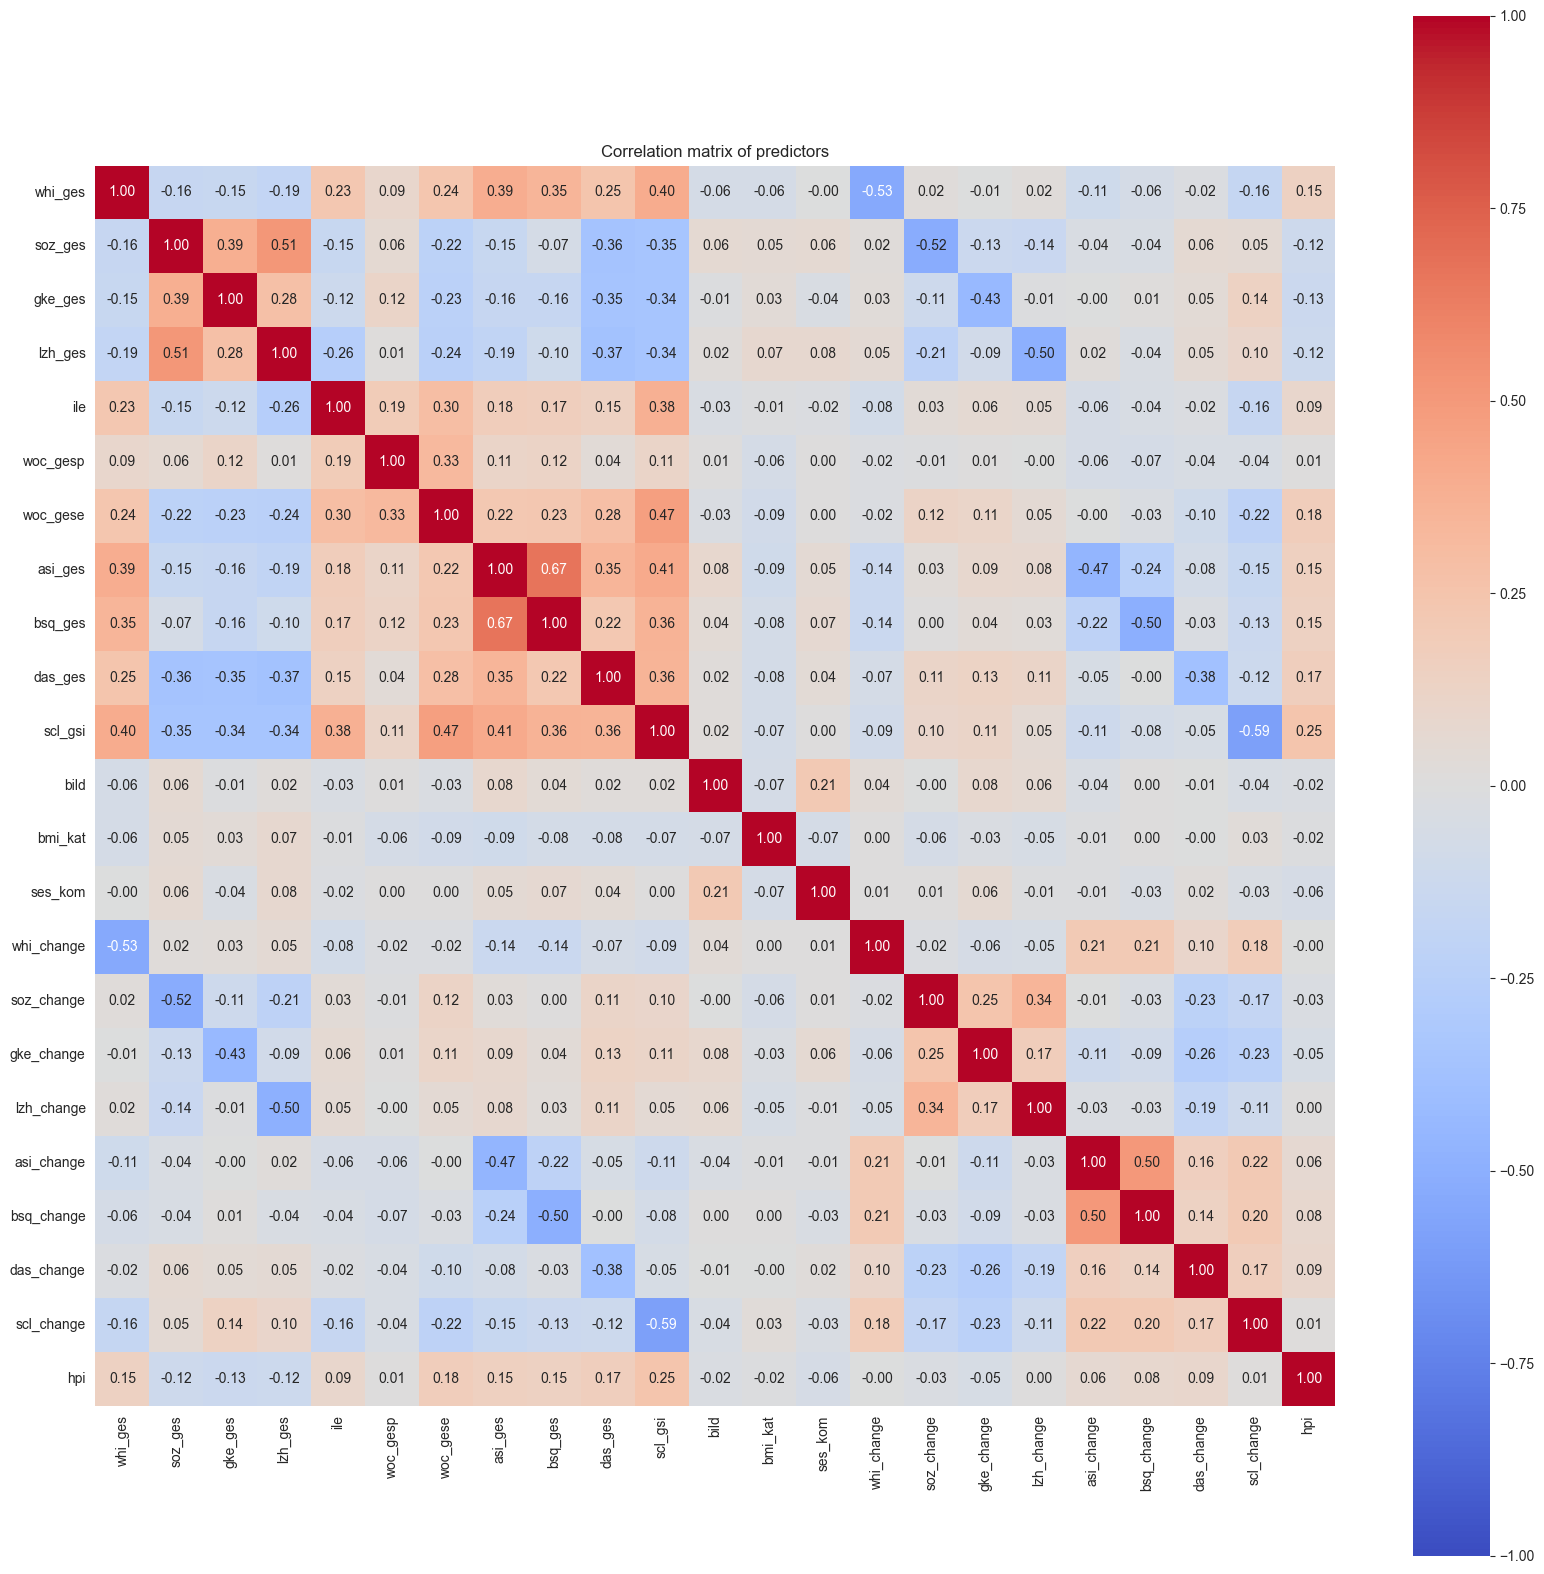

In [37]:
# get correlation matrix
corr = data.corr()
# plot correlation matrix
plt.figure(figsize = (20, 20))
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = "coolwarm", square = True, vmin = -1, vmax = 1)
plt.title("Correlation matrix of predictors")

Text(0.5, 1.0, 'Correlation matrix of predictors')

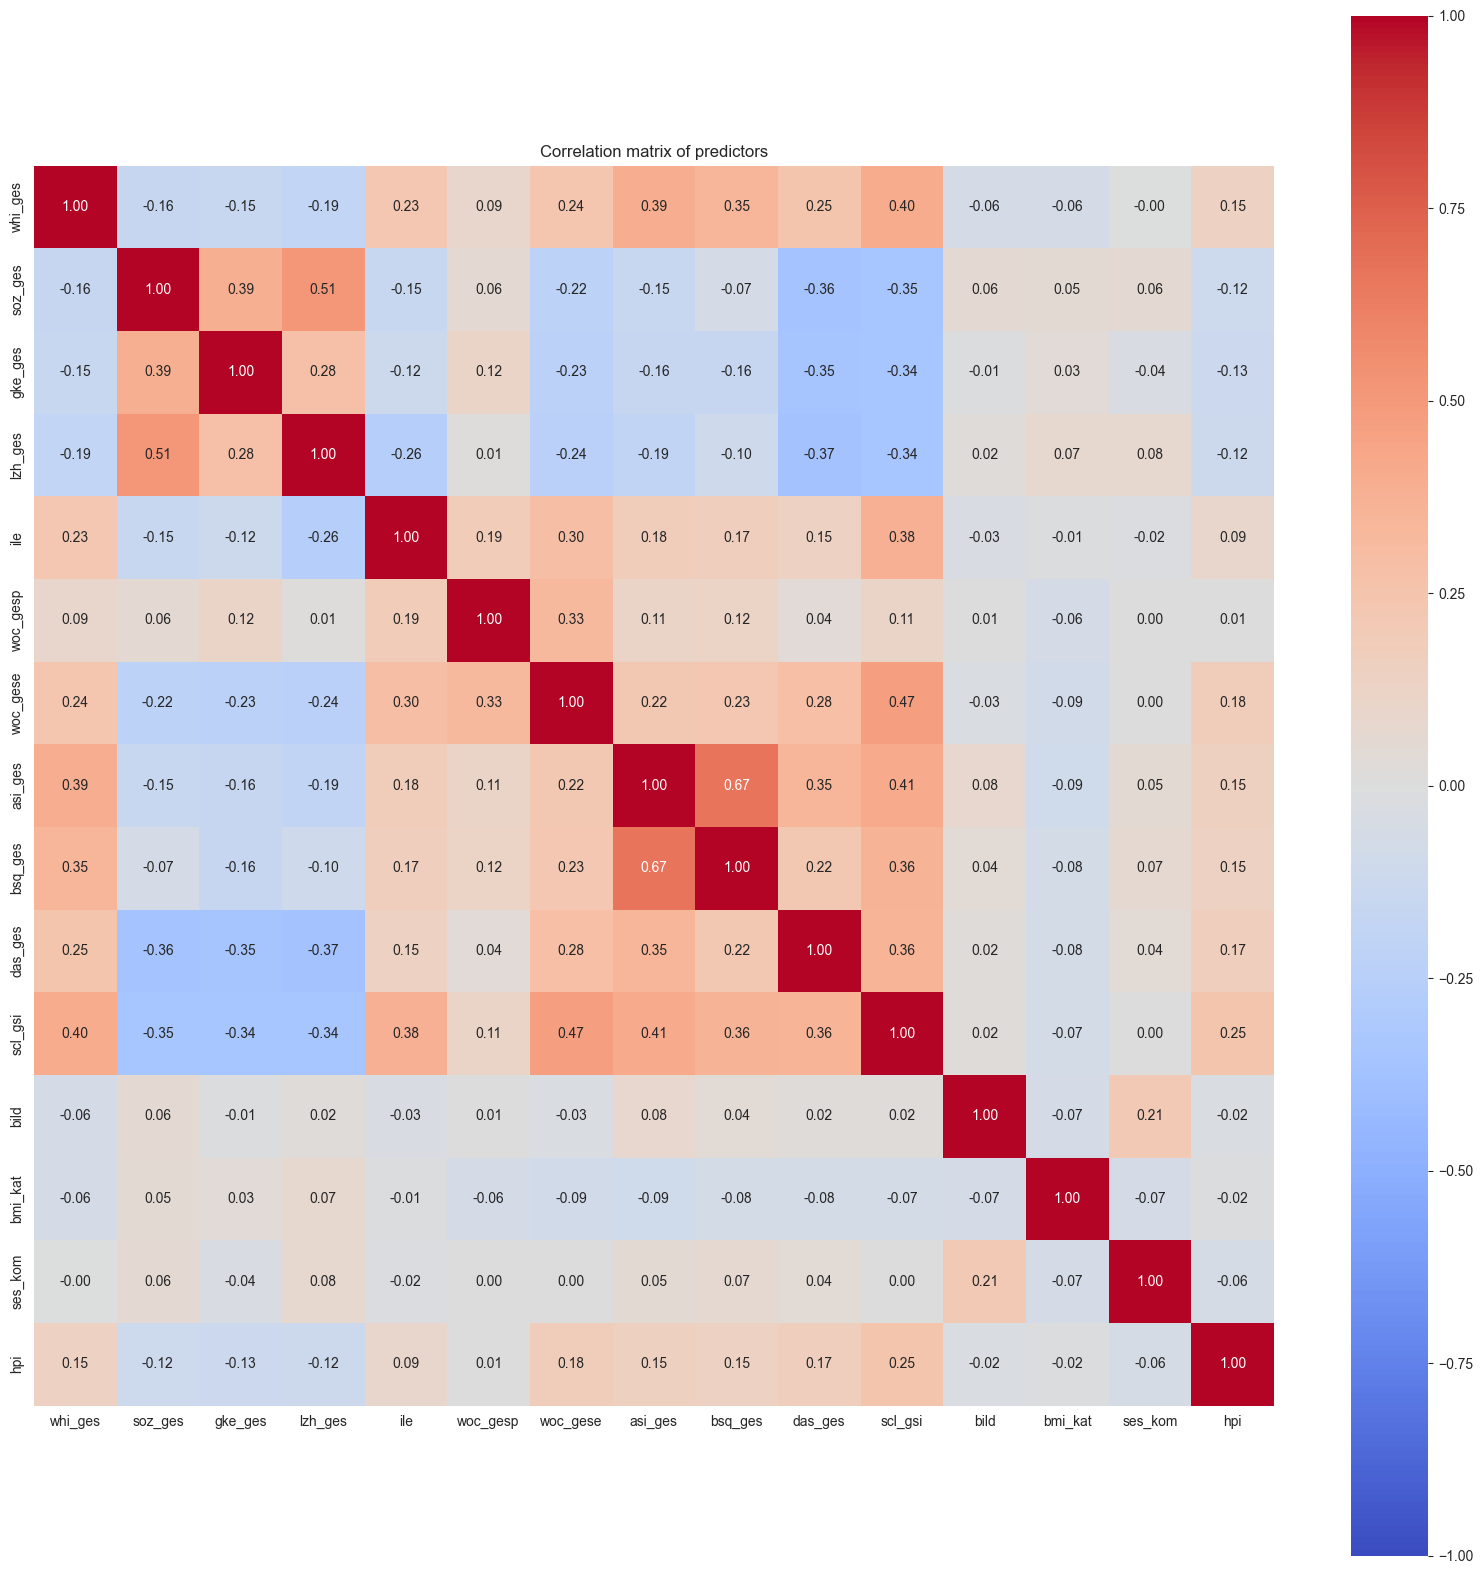

In [38]:
# get correlation matrix
corr = data_pred.corr()
# plot correlation matrix
plt.figure(figsize = (20, 20))
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = "coolwarm", square = True, vmin = -1, vmax = 1)
plt.title("Correlation matrix of predictors")

## 4 Save data

In [39]:
# data.to_csv("../dat/dips/DIPS_Data_cleaned_change.csv", sep = ",", index = False)
data.to_csv("../dat/dips/DIPS_Data_cleaned_change_excl.csv", sep = ",", index = False)

In [40]:
len(data)

982

In [41]:
# check sd for every variable
for col in data.columns:
    print(col, round(data[col].mean(), 3), round(data[col].std(), 3))

whi_ges -0.0 1.001
soz_ges 0.0 1.001
gke_ges -0.0 1.001
lzh_ges -0.0 1.001
ile -0.0 1.001
woc_gesp 0.0 1.001
woc_gese 0.0 1.001
asi_ges 0.0 1.001
bsq_ges -0.0 1.001
das_ges 0.0 1.001
scl_gsi -0.0 1.001
bild -0.165 0.607
bmi_kat -0.097 0.551
ses_kom -0.176 0.577
whi_change 0.0 1.001
soz_change 0.0 1.001
gke_change -0.0 1.001
lzh_change -0.0 1.001
asi_change 0.0 1.001
bsq_change -0.0 1.001
das_change -0.0 1.001
scl_change -0.0 1.001
hpi 0.257 0.437
